# Machine Learning for Drug Discovery

### Importing Data From chembl-DataBase

In [1]:
import pandas as pd  
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV, ElasticNetCV
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")
print(" All the libraries are imported")

 All the libraries are imported


In [2]:
from rdkit import Chem
 

In [1]:
import pandas as pd
from chembl_webresource_client.new_client import new_client

In [2]:
target = new_client.target
target_query = target.search('Aromatase (human)')
targets = pd.DataFrame.from_dict(target_query)
targets

,cross_references,organism,pref_name,score,species_group_flag,target_chembl_id,target_components,target_type,tax_id
0,"[{'xref_id': 'P11511', 'xref_name': None, 'xre...",Homo sapiens,Cytochrome P450 19A1,20.0,False,CHEMBL1978,"[{'accession': 'P11511', 'component_descriptio...",SINGLE PROTEIN,9606
1,"[{'xref_id': 'P22443', 'xref_name': None, 'xre...",Rattus norvegicus,Cytochrome P450 19A1,20.0,False,CHEMBL3859,"[{'accession': 'P22443', 'component_descriptio...",SINGLE PROTEIN,10116
2,"[{'xref_id': 'P04439', 'xref_name': None, 'xre...",Homo sapiens,HLA class I histocompatibility antigen A-3,12.0,False,CHEMBL2632,"[{'accession': 'P04439', 'component_descriptio...",SINGLE PROTEIN,9606
3,"[{'xref_id': 'P31358', 'xref_name': None, 'xre...",Homo sapiens,CAMPATH-1 antigen,11.0,False,CHEMBL1912,"[{'accession': 'P31358', 'component_descriptio...",SINGLE PROTEIN,9606
4,"[{'xref_id': 'P08246', 'xref_name': None, 'xre...",Homo sapiens,Leukocyte elastase,11.0,False,CHEMBL248,"[{'accession': 'P08246', 'component_descriptio...",SINGLE PROTEIN,9606
...,...,...,...,...,...,...,...,...,...
162,"[{'xref_id': 'P20444', 'xref_name': None, 'xre...",Mus musculus,Protein kinase C alpha,4.0,False,CHEMBL2567,"[{'accession': 'P20444', 'component_descriptio...",SINGLE PROTEIN,10090
163,"[{'xref_id': 'P63319', 'xref_name': None, 'xre...",Rattus norvegicus,Protein kinase C gamma,4.0,False,CHEMBL3604,"[{'accession': 'P63319', 'component_descriptio...",SINGLE PROTEIN,10116
164,[],Homo sapiens,Cytochrome P450 1A,4.0,False,CHEMBL3544905,"[{'accession': 'P04798', 'component_descriptio...",PROTEIN FAMILY,9606
165,[],Homo sapiens,Cytochrome P450,3.0,False,CHEMBL4523986,"[{'accession': 'P08684', 'component_descriptio...",PROTEIN FAMILY,9606


In [3]:
selected_target = targets.target_chembl_id[0]
selected_target

'CHEMBL1978'

In [4]:
activity = new_client.activity
res = activity.filter(target_chembl_id=selected_target).filter(standard_type="IC50")

In [5]:
df = pd.DataFrame.from_dict(res)

In [ ]:
##selecting compounds that can bind to the target protein with standard type as IC50


In [6]:
df

,action_type,activity_comment,activity_id,activity_properties,assay_chembl_id,assay_description,assay_type,assay_variant_accession,assay_variant_mutation,bao_endpoint,...,target_organism,target_pref_name,target_tax_id,text_value,toid,type,units,uo_units,upper_value,value
0,None,None,82585,[],CHEMBL666794,Inhibition of Cytochrome P450 19A1,B,None,None,BAO_0000190,...,Homo sapiens,Cytochrome P450 19A1,9606,None,None,IC50,uM,UO_0000065,None,7.1
1,None,None,94540,[],CHEMBL666794,Inhibition of Cytochrome P450 19A1,B,None,None,BAO_0000190,...,Homo sapiens,Cytochrome P450 19A1,9606,None,None,IC50,uM,UO_0000065,None,50.0
2,None,None,112960,[],CHEMBL661700,In vitro inhibition of human Cytochrome P450 19A1,B,None,None,BAO_0000190,...,Homo sapiens,Cytochrome P450 19A1,9606,None,None,IC50,uM,UO_0000065,None,0.238
3,None,None,116766,[],CHEMBL661700,In vitro inhibition of human Cytochrome P450 19A1,B,None,None,BAO_0000190,...,Homo sapiens,Cytochrome P450 19A1,9606,None,None,IC50,uM,UO_0000065,None,0.057
4,None,None,118017,[],CHEMBL661700,In vitro inhibition of human Cytochrome P450 19A1,B,None,None,BAO_0000190,...,Homo sapiens,Cytochrome P450 19A1,9606,None,None,IC50,uM,UO_0000065,None,0.054
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2961,"{'action_type': 'INHIBITOR', 'description': 'N...",None,24742461,"[{'comments': None, 'relation': '=', 'result_f...",CHEMBL5118295,Inhibition of aromatase in human JEG-3 cells u...,B,None,None,BAO_0000190,...,Homo sapiens,Cytochrome P450 19A1,9606,None,None,IC50,nM,UO_0000065,None,50.1
2962,None,None,24783443,[],CHEMBL5130158,Inhibition of human placental microsome CYP19 ...,A,None,None,BAO_0000190,...,Homo sapiens,Cytochrome P450 19A1,9606,None,None,IC50,uM,UO_0000065,None,10.0
2963,"{'action_type': 'INHIBITOR', 'description': 'N...",None,24886565,[],CHEMBL5157477,Inhibition of aromatase (unknown origin),B,None,None,BAO_0000190,...,Homo sapiens,Cytochrome P450 19A1,9606,None,None,IC50,uM,UO_0000065,None,0.031
2964,"{'action_type': 'INHIBITOR', 'description': 'N...",None,24886566,[],CHEMBL5157477,Inhibition of aromatase (unknown origin),B,None,None,BAO_0000190,...,Homo sapiens,Cytochrome P450 19A1,9606,None,None,IC50,uM,UO_0000065,None,0.042


In [8]:
df.to_csv('Aromatsechembl.csv', index=False, mode='a', header=False)


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2966 entries, 0 to 2965
Data columns (total 46 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   action_type                85 non-null     object
 1   activity_comment           94 non-null     object
 2   activity_id                2966 non-null   int64 
 3   activity_properties        2966 non-null   object
 4   assay_chembl_id            2966 non-null   object
 5   assay_description          2966 non-null   object
 6   assay_type                 2966 non-null   object
 7   assay_variant_accession    0 non-null      object
 8   assay_variant_mutation     0 non-null      object
 9   bao_endpoint               2966 non-null   object
 10  bao_format                 2966 non-null   object
 11  bao_label                  2966 non-null   object
 12  canonical_smiles           2966 non-null   object
 13  data_validity_comment      127 non-null    object
 14  data_val

In [9]:
df1 = df.copy()

In [12]:
df1['standard_value'] = df1.standard_value.astype(float)

In [13]:
df1.isnull().sum()

action_type                  2881
activity_comment             2872
activity_id                     0
activity_properties             0
assay_chembl_id                 0
assay_description               0
assay_type                      0
assay_variant_accession      2966
assay_variant_mutation       2966
bao_endpoint                    0
bao_format                      0
bao_label                       0
canonical_smiles                0
data_validity_comment        2839
data_validity_description    2839
document_chembl_id              0
document_journal               25
document_year                   0
ligand_efficiency             482
molecule_chembl_id              0
molecule_pref_name           2626
parent_molecule_chembl_id       0
pchembl_value                 445
potential_duplicate             0
qudt_units                     47
record_id                       0
relation                       76
src_id                          0
standard_flag                   0
standard_relat

In [14]:
df1.standard_value.isnull().sum()

76

In [17]:
#removing instances with missing standard values(roughly 3% of the entire dataset) and instances where standard unit is not nM (roughly 1% of the entire dataset)

df1 = df1[df1.standard_value.notnull()]

In [18]:
df1.to_csv("compound_data.csv", index=False)


In [6]:
df1 =pd.read_csv('compound_data.csv')

In [7]:
#selecting features that relate to the chemical structure(canonical smiles) and compo
df2 = df1.copy()
df2 = df2[['canonical_smiles', 'molecule_chembl_id', 'standard_value']]
df2.head(3)

,canonical_smiles,molecule_chembl_id,standard_value
0,CC12CCC(O)CC1=CCC1C2CCC2(C)C(CC3CN3)CCC12,CHEMBL341591,7100.0
1,C[C@]12CC[C@H]3[C@@H](CC=C4C[C@@H](O)CC[C@@]43...,CHEMBL2111947,50000.0
2,CCn1c(C(c2ccc(F)cc2)n2ccnc2)c(C)c2cc(Br)ccc21,CHEMBL431859,238.0


In [8]:

df2.to_csv('preprocessed_compound data')

In [9]:
df2

,canonical_smiles,molecule_chembl_id,standard_value
0,CC12CCC(O)CC1=CCC1C2CCC2(C)C(CC3CN3)CCC12,CHEMBL341591,7100.0
1,C[C@]12CC[C@H]3[C@@H](CC=C4C[C@@H](O)CC[C@@]43...,CHEMBL2111947,50000.0
2,CCn1c(C(c2ccc(F)cc2)n2ccnc2)c(C)c2cc(Br)ccc21,CHEMBL431859,238.0
3,CCn1cc(C(c2ccc(F)cc2)n2ccnc2)c2ccccc21,CHEMBL113637,57.0
4,Clc1ccccc1Cn1cc(Cn2ccnc2)c2ccccc21,CHEMBL112021,54.0
...,...,...,...
2885,C=C1C[C@@H]2[C@H](CC[C@]3(C)C(=O)CC[C@@H]23)[C...,CHEMBL1200374,50.1
2886,O=C(Nc1ccc2[nH]ncc2c1)[C@]12ON=C(c3cccnc3)[C@H...,CHEMBL5184829,10000.0
2887,CCOC(=O)Cc1csc(N/N=C/c2ccc3cc(OC)ccc3c2)n1,CHEMBL5176279,31.0
2888,COc1ccc2cc(/C=N/NC3=NC(=O)CS3)ccc2c1,CHEMBL5177928,42.0


Data processing

In [10]:
df3 = df2.copy()

In [11]:
#function to cap the standard values between 1*10^8 nM and 1*10^-12 nM so that log10 function does not encounter zero and ligand efficiency is not 0.
def norm_value(input):
    norm = []
    for i in df3["standard_value"]:
        if i >100000000:
            i = 100000000
        elif i == 0:
            i=0.000000000001
        norm.append(i)
    
    df3["standard_value_norm"] = norm
    x = df3.drop("standard_value", axis=1)
    return x

In [12]:
df3 = norm_value(df3)


In [13]:
#computing ligand efficiency values using LEcalc function     
def LEcalc(smiles,standard_value,verbose=False):
    
    molecules = []
    HAC = []
    le = []
    
    for i in smiles:
        mol = Chem.MolFromSmiles(i)
        molecules.append(mol)
    for j in molecules:
        HAC.append(j.GetNumHeavyAtoms())
    for k in range(len(HAC)):
        IC50 = (float(standard_value[k]))*10**(-9)
        le.append((-1.4*np.log10(IC50))/HAC[k])
    return le

In [16]:
#computing ligand efficiency values using LEcalc function     
df3['le'] = LEcalc(df3.canonical_smiles,df3.standard_value_norm.tolist())
df3.head()

,canonical_smiles,molecule_chembl_id,standard_value_norm,le
0,CC12CCC(O)CC1=CCC1C2CCC2(C)C(CC3CN3)CCC12,CHEMBL341591,7100.0,0.300343
1,C[C@]12CC[C@H]3[C@@H](CC=C4C[C@@H](O)CC[C@@]43...,CHEMBL2111947,50000.0,0.261802
2,CCn1c(C(c2ccc(F)cc2)n2ccnc2)c(C)c2cc(Br)ccc21,CHEMBL431859,238.0,0.356646
3,CCn1cc(C(c2ccc(F)cc2)n2ccnc2)c2ccccc21,CHEMBL113637,57.0,0.422574
4,Clc1ccccc1Cn1cc(Cn2ccnc2)c2ccccc21,CHEMBL112021,54.0,0.442376


The ligand efficiency cut off for hit compounds is set to be between 0.2 and 0.35. Hit compounds are compounds that show some activity against the target protein and can be chemically modified to have improved potency and drug-like properties. The binding of hits to the target does not have to be extremely good as this can be optimised further after hit identification. This broad range of ligand efficiencies chosen is due a large range of heavy atom counts (HAC) among all the screened compounds. HAC is a proxy for molecular size. The optimal ligand effiency cut off depends on the molecular size of the screened compounds. The details of calculating target ligand efficiency values can be found in this paper. ⁵. A larger range of ligand efficiency values also allow for a more diverse set of hits to be investigated. This can potentially lead to drug molecules with novel structures compared to marketed drugs.

In [17]:
bioactivity_class = []

for i in df3['le']:
    if i>0.2 and i<0.35:
        bioactivity_class.append("active")
    else:
        bioactivity_class.append("inactive")
df3['bioactivity_class'] = bioactivity_class

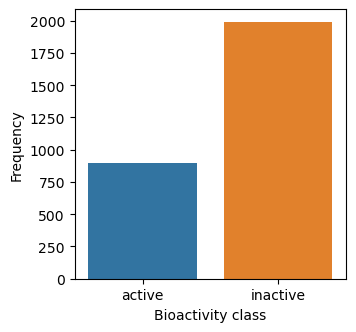

In [18]:
bio_class = []
classes = ['active', 'inactive']
for i in classes:
    frequency = bioactivity_class.count(i)
    bio_class.append(frequency)
plt.figure(figsize=(3.5,3.5))
ax = sns.barplot(x=classes,y=bio_class)
ax.set(xlabel='Bioactivity class',
       ylabel='Frequency')
plt.show()

In [26]:
from rdkit.Chem import Descriptors,Lipinski


In [27]:
#Calculating Lipinksi Rule of 5 descriptors
def descriptors(smiles,verbose=False):
    
    molecules = []
    for i in smiles:
        mol = Chem.MolFromSmiles(i)
        molecules.append(mol)
    
    i=0
    for j in molecules:
        
        desc_MolWt = Descriptors.MolWt(j)
        desc_LogP = Descriptors.MolLogP(j)
        desc_NumHDonors = Lipinski.NumHDonors(j)
        desc_NumHAcceptors = Lipinski.NumHAcceptors(j)
        
        row = np.array([desc_MolWt, desc_LogP, desc_NumHDonors, desc_NumHAcceptors])   
        
        if i==0:
            baseData = row
            
        else:
            baseData = np.vstack([baseData, row])
        i=i+1
    
    columnNames = ["MW", "LogP", "NumHDonors", "NumHAcceptors"]
    descriptors = pd.DataFrame(data = baseData, columns = columnNames)
   
    return descriptors
    

In [29]:
index=np.arange(0,2890,1)
df_lipinski = descriptors(df3.canonical_smiles)
df_lipinski['index']=index
df3['index']=index

In [30]:

df_combined = df3.merge(df_lipinski)
df_combined.head()

,canonical_smiles,molecule_chembl_id,standard_value_norm,le,bioactivity_class,index,MW,LogP,NumHDonors,NumHAcceptors
0,CC12CCC(O)CC1=CCC1C2CCC2(C)C(CC3CN3)CCC12,CHEMBL341591,7100.0,0.300343,active,0,329.528,4.28820,2.0,2.0
1,C[C@]12CC[C@H]3[C@@H](CC=C4C[C@@H](O)CC[C@@]43...,CHEMBL2111947,50000.0,0.261802,active,1,315.501,3.89810,2.0,2.0
2,CCn1c(C(c2ccc(F)cc2)n2ccnc2)c(C)c2cc(Br)ccc21,CHEMBL431859,238.0,0.356646,inactive,2,412.306,5.70542,0.0,3.0
3,CCn1cc(C(c2ccc(F)cc2)n2ccnc2)c2ccccc21,CHEMBL113637,57.0,0.422574,inactive,3,319.383,4.63450,0.0,3.0
4,Clc1ccccc1Cn1cc(Cn2ccnc2)c2ccccc21,CHEMBL112021,54.0,0.442376,inactive,4,321.811,4.58780,0.0,3.0


In [31]:
df_combined.to_csv('compounds_descriptors.csv')


Convert IC50 values to pIC50 values to allow easier understanding of standard value distributions.

In [32]:
def pIC50(data):
    pIC50 = []
    for i in data["standard_value_norm"]:
        molar = i*(10**-9)
        pIC50.append(-np.log10(molar))
    data["pIC50"] = pIC50
    final = data.drop("standard_value_norm", axis=1) 
    return final

In [33]:
df_pIC50 = pIC50(df_combined)
df_pIC50.head()

,canonical_smiles,molecule_chembl_id,le,bioactivity_class,index,MW,LogP,NumHDonors,NumHAcceptors,pIC50
0,CC12CCC(O)CC1=CCC1C2CCC2(C)C(CC3CN3)CCC12,CHEMBL341591,0.300343,active,0,329.528,4.28820,2.0,2.0,5.148742
1,C[C@]12CC[C@H]3[C@@H](CC=C4C[C@@H](O)CC[C@@]43...,CHEMBL2111947,0.261802,active,1,315.501,3.89810,2.0,2.0,4.301030
2,CCn1c(C(c2ccc(F)cc2)n2ccnc2)c(C)c2cc(Br)ccc21,CHEMBL431859,0.356646,inactive,2,412.306,5.70542,0.0,3.0,6.623423
3,CCn1cc(C(c2ccc(F)cc2)n2ccnc2)c2ccccc21,CHEMBL113637,0.422574,inactive,3,319.383,4.63450,0.0,3.0,7.244125
4,Clc1ccccc1Cn1cc(Cn2ccnc2)c2ccccc21,CHEMBL112021,0.442376,inactive,4,321.811,4.58780,0.0,3.0,7.267606


In [75]:
df_pIC50.to_csv('pic50')

In [11]:
df_pIC50 = pd.read_csv('pic50')

Exploratory Data Analysis

In [41]:
#Mann–Whitney U test to determine whether the difference in a feature is significant for active and inactive compounds. 
def mannwhitney(descriptor, verbose=False):
    from scipy.stats import mannwhitneyu
    
    selection = [descriptor, "bioactivity_class"]
    df = df_pIC50[selection]
    active = df[df.bioactivity_class == "active"]
    active = active[descriptor]
    
    inactive = df[df.bioactivity_class == "inactive"]
    inactive = inactive[descriptor]
    
    stat, p = mannwhitneyu(active,inactive)
    
    alpha = 0.05
    if p > 0.05:
        interpretation = "The difference between active and inactive compounds is statistically insignificant."
    if p < 0.05:
        interpretation = "The difference between active and inactive compounds is statistically significant. "
        
    return interpretation,"p value is "+ str(p)
    

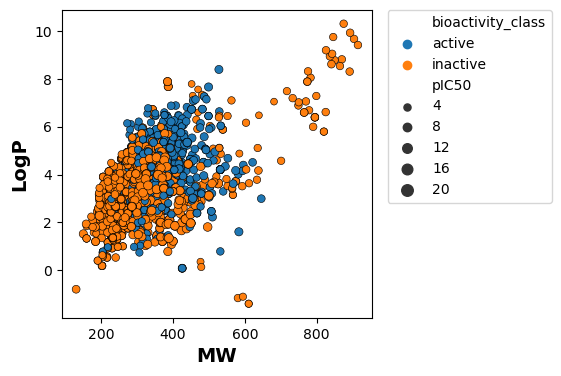

In [48]:
plt.figure(figsize=(4,4))
sns.scatterplot(x="MW", y="LogP", data=df_pIC50, hue = 'bioactivity_class',size='pIC50', edgecolor='black')
plt.xlabel("MW",fontsize=14, fontweight='bold')
plt.ylabel("LogP",fontsize=14, fontweight='bold')
plt.legend(bbox_to_anchor=(1.05,1), loc=2, borderaxespad=0)


Most of the compounds have a molecular weight of between 200 and 500 Da and logP values between 1 and 6. This is reasonable as drugs with MW>500 and logP>5 tend to lead to poor absorption.⁶ Good absorption is needed for orally administered drugs.

Text(0, 0.5, 'pIC50 value')

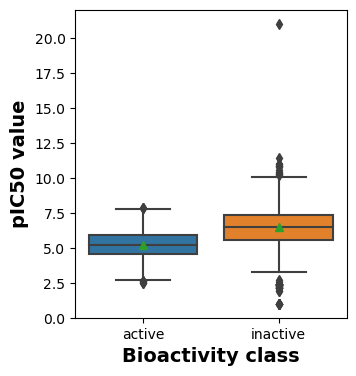

In [49]:
plt.figure(figsize=(3.5,4))
sns.boxplot(x="bioactivity_class", y="pIC50", data=df_pIC50,showmeans=True)
plt.xlabel("Bioactivity class",fontsize=14, fontweight="bold")
plt.ylabel("pIC50 value",fontsize=14, fontweight="bold")

In [50]:
mannwhitney("pIC50")


('The difference between active and inactive compounds is statistically significant. ',
 'p value is 1.5156015971815495e-132')

Text(0, 0.5, 'MW')

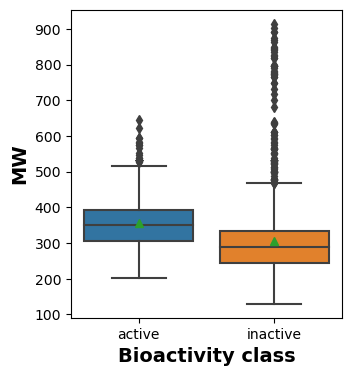

In [51]:
plt.figure(figsize=(3.5,4))
sns.boxplot(x="bioactivity_class",y="MW", data=df_pIC50,showmeans=True)

plt.xlabel("Bioactivity class",fontsize=14, fontweight="bold")
plt.ylabel("MW",fontsize=14, fontweight="bold")

In [53]:
mannwhitney("MW")

('The difference between active and inactive compounds is statistically significant. ',
 'p value is 7.172093851651495e-88')

Text(0, 0.5, 'LogP')

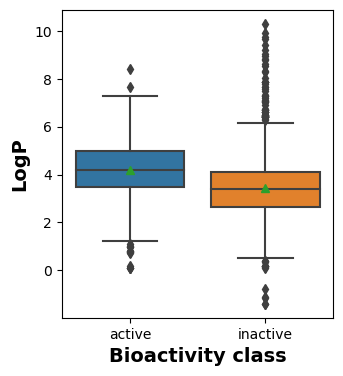

In [52]:
plt.figure(figsize=(3.5,4))
sns.boxplot(x="bioactivity_class",y="LogP", data=df_pIC50,showmeans=True)

plt.xlabel("Bioactivity class",fontsize=14, fontweight="bold")
plt.ylabel("LogP",fontsize=14, fontweight="bold")

In [54]:
mannwhitney("LogP")


('The difference between active and inactive compounds is statistically significant. ',
 'p value is 4.779110109058533e-61')

Text(0, 0.5, 'Number of hydrogen bond donors')

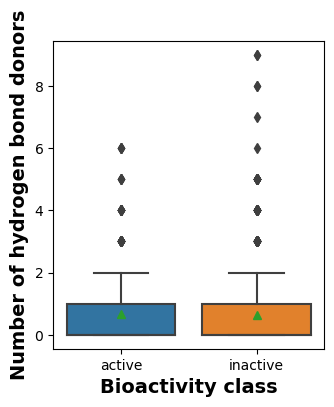

In [55]:
plt.figure(figsize=(3.5,4))
sns.boxplot(x="bioactivity_class",y="NumHDonors", data=df_pIC50,showmeans=True)
plt.xlabel("Bioactivity class",fontsize=14, fontweight="bold")
plt.ylabel("Number of hydrogen bond donors",fontsize=14, fontweight="bold")

In [56]:
mannwhitney("NumHDonors")


('The difference between active and inactive compounds is statistically insignificant.',
 'p value is 0.24495983735744675')

Text(0, 0.5, 'Number of hydrogen bond acceptors')

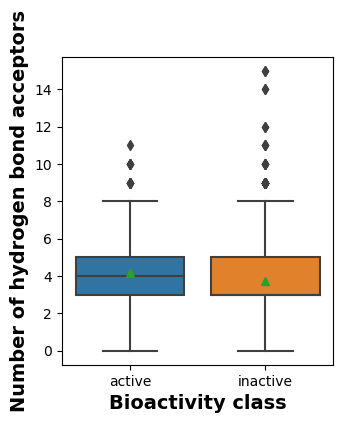

In [57]:
plt.figure(figsize=(3.5,4))
sns.boxplot(x="bioactivity_class",y="NumHAcceptors", data=df_pIC50,showmeans=True)
plt.xlabel("Bioactivity class",fontsize=14, fontweight="bold")
plt.ylabel("Number of hydrogen bond acceptors",fontsize=14, fontweight="bold")

In [58]:
mannwhitney("NumHAcceptors")


('The difference between active and inactive compounds is statistically significant. ',
 'p value is 1.3429728054852188e-13')

Interpretation of results
Active compounds have higher MWs, higher logP values and higher numbers of hydrogen bond acceptors. The difference in number of hydrogen bond donors for active and inactive compounds is not significant. There may be some hydrogen bonding happening between active compounds and the target binding site. However,this cannot be confirmed without further studies. High MW and high logP tend to result in poor absorption as mentioned above and these metrics can result in undersirable non-specific binding interactions. However, majority of the active compounds have MW<500 and logP<5, so the binding should be specific enough to the target protein.

In [59]:

selection = ['canonical_smiles', 'molecule_chembl_id']
df_prep = df_pIC50[selection]
df_prep.to_csv("molecule.smi",sep="\t",index=False, header=False)

In [60]:
!type molecule.smi


CC12CCC(O)CC1=CCC1C2CCC2(C)C(CC3CN3)CCC12	CHEMBL341591
C[C@]12CC[C@H]3[C@@H](CC=C4C[C@@H](O)CC[C@@]43C)[C@@H]1CC[C@@H]2[C@H]1CN1	CHEMBL2111947
CCn1c(C(c2ccc(F)cc2)n2ccnc2)c(C)c2cc(Br)ccc21	CHEMBL431859
CCn1cc(C(c2ccc(F)cc2)n2ccnc2)c2ccccc21	CHEMBL113637
Clc1ccccc1Cn1cc(Cn2ccnc2)c2ccccc21	CHEMBL112021
Cc1ccc(S(=O)(=O)n2cc(C(c3ccccc3)n3ccnc3)c3ccccc32)cc1	CHEMBL324070
CCn1ccc2cc(C(c3ccc(F)cc3)n3ccnc3)ccc21	CHEMBL41761
Cn1cc(C(c2ccc(F)cc2)n2ccnc2)c2cc(Br)ccc21	CHEMBL111868
CCn1cc(C(c2ccc(F)cc2)n2ccnc2)c2cc(Br)ccc21	CHEMBL111888
CCn1ccc2cc(C(c3ccccc3)n3ccnc3)ccc21	CHEMBL112074
N#Cc1ccc(Cn2cc(Cn3ccnc3)c3ccccc32)cc1	CHEMBL324326
CCCCCCN1C(=O)CCC(CC)(c2ccncc2)C1=O	CHEMBL37321
c1ccc2c(c1)CCC1C(c3cc[nH]n3)C21	CHEMBL353068
CCCCCCCC1(c2ccncc2)CCC(=O)NC1=O	CHEMBL41066
O=C1/C(=C/c2cccnn2)CCc2ccccc21	CHEMBL166709
O=C1/C(=C/c2ccnnc2)CCc2ccccc21	CHEMBL424556
C[C@]12CC[C@H]3[C@@H](CC=C4[C@H](O)CCC[C@@]43CO)[C@@H]1CCC2=O	CHEMBL1630273
C[C@]12CCCC=C1[C@H](O)C[C@@H]1[C@@H]2CC[C@]2(C)C(=O)CC[C@@H]12	CHEMBL

import requests

url = 'https://github.com/dataprofessor/bioinformatics/raw/master/padel.sh'
filename = 'padel.sh'

try:
    response = requests.get(url, timeout=10)  # Set the timeout value (in seconds)
    response.raise_for_status()  # Raise an exception for 4xx and 5xx status codes
    with open(filename, 'wb') as file:
        file.write(response.content)
    print(f"File '{filename}' downloaded successfully.")
except requests.exceptions.RequestException as e:
    print(f"Error: {e}")






#using file from https://github.com/dataprofessor/bioinformatics/raw/master/padel.sh
import urllib.request
url = 'https://github.com/dataprofessor/bioinformatics/raw/master/padel.sh'
filename = 'padel.sh'
urllib.request.urlretrieve(url, filename)

In [62]:
!bash padel.sh


'bash' is not recognized as an internal or external command,
operable program or batch file.


In [68]:
pip install padelpy


Note: you may need to restart the kernel to use updated packages.


In [69]:
from  padelpy import  padeldescriptor


In [72]:
padeldescriptor(mol_dir='molecule.smi', d_file='output.txt')


In [74]:
! curl https://github.com/dataprofessor/bioinformatics/raw/master/padel.zip
! curl https://github.com/dataprofessor/bioinformatics/raw/master/padel.sh

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0      0 --:--:--  0:00:01 --:--:--     0
  0     0    0     0    0     0      0      0 --:--:--  0:00:04 --:--:--     0
  0     0    0     0    0     0      0      0 --:--:--  0:00:05 --:--:--     0
  0     0    0     0    0     0      0      0 --:--:--  0:00:05 --:--:--     0
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0


In [ ]:
### molecular descriptor calculations are done online due to link timeout
## this was done using google colab since jupyter notebook doesnt support jre enviroment

In [7]:
dfd = pd.read_csv('descriptors_output.csv')

In [3]:
import pandas as pd

In [8]:
dfd

,Name,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,...,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
0,CHEMBL2111947,1,1,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,CHEMBL341591,1,1,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,CHEMBL431859,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,CHEMBL113637,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,CHEMBL112021,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2885,CHEMBL1200374,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2886,CHEMBL5176279,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2887,CHEMBL5184829,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2888,CHEMBL5177928,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
df_prep= pd.read_csv("descriptors_output.csv")
df_prep_X = df_prep.copy()
X = df_prep_X.drop(columns=["Name"])
Y = df_pIC50["pIC50"]

NameError: name 'df_pIC50' is not defined

In [81]:
dataset = pd.concat([df_prep_X,df_prep_y],axis=1)
dataset.to_csv("train_and_test.csv",index=False)

In [83]:
#importing libraries
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.feature_selection import VarianceThreshold
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from sklearn.preprocessing import MinMaxScaler,StandardScaler


In [84]:
def metrics(X_train,X_test,y_train,y_test,model):
    y_pred = model.predict(X_test)
    print("Training set accuracy:{:0.2f} ".format(model.score(X_train,y_train)))
    print("Test set accuracy:{:0.2f} ".format(model.score(X_test,y_test)))
    print("Mean square error:{:0.2f} ".format(_Rmean_squared_error(y_test,y_pred)))
    print("Mean absolute error:{:0.2f} ".format(mean_absolute_error(y_test,y_pred)))
    print("Root Mean square error:{:0.2f} ".format((R__mean_squared_error(y_test,y_pred))**0.5))
    print("-------------------------------------")
    return

In [85]:
df_prep

,Name,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,...,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
0,CHEMBL2111947,1,1,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,CHEMBL341591,1,1,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,CHEMBL431859,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,CHEMBL113637,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,CHEMBL112021,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2885,CHEMBL1200374,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2886,CHEMBL5176279,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2887,CHEMBL5184829,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2888,CHEMBL5177928,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [31]:
vr = []
for i in dfd.iloc[::,1:]:
    if dfd[i].var() > 0.1:

        vr.append(i)
print(len(vr))

dfd.var() 

239


PubchemFP0      0.000346
PubchemFP1      0.003793
PubchemFP2      0.248245
PubchemFP3      0.046425
PubchemFP4      0.000000
                  ...   
PubchemFP876    0.000000
PubchemFP877    0.000000
PubchemFP878    0.000000
PubchemFP879    0.000000
PubchemFP880    0.000000
Length: 881, dtype: float64

we have put variance threshold of 0.075 and will do RF and agian we will do feature selection by SFS best and check the results

In [34]:
from sklearn.feature_selection import VarianceThreshold

In [37]:
var1 =VarianceThreshold(0.1)
X  = var1.fit_transform(X)

In [ ]:
## After variance threshold the no of columns reduced to 239 from 881

In [52]:
xtrain,xtest,ytrain,ytest  = train_test_split(X,Y, train_size= 0.80,random_state=1)

<AxesSubplot:ylabel='pIC50'>

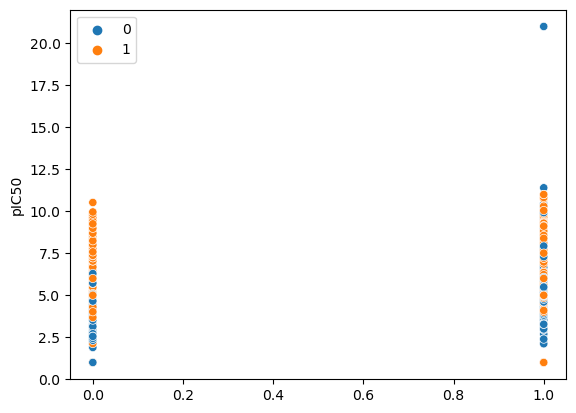

In [70]:
sns.scatterplot(X[::,0],Y, hue = X[::,3])

In [66]:
X[::,0]

2890

In [42]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR



In [43]:
def metrics(X_train,X_test,y_train,y_test,model):
    y_pred = model.predict(X_test)
    print("Training set accuracy:{:0.2f} ".format(model.score(X_train,y_train)))
    print("Test set accuracy:{:0.2f} ".format(model.score(X_test,y_test)))
    print("Mean square error:{:0.2f} ".format(mean_squared_error(y_test,y_pred)))
    print("Mean absolute error:{:0.2f} ".format(mean_absolute_error(y_test,y_pred)))
    print("Root Mean square error:{:0.2f} ".format((mean_squared_error(y_test,y_pred))**0.5))
    print("-------------------------------------")
    return

In [59]:
rf = RandomForestRegressor()
m1 = rf.fit(xtrain,ytrain)
metrics(xtrain,xtest,ytrain,ytest,m1)

Training set accuracy:0.68 
Test set accuracy:0.44 
Mean square error:1.07 
Mean absolute error:0.75 
Root Mean square error:1.04 
-------------------------------------


<AxesSubplot:xlabel='pIC50'>

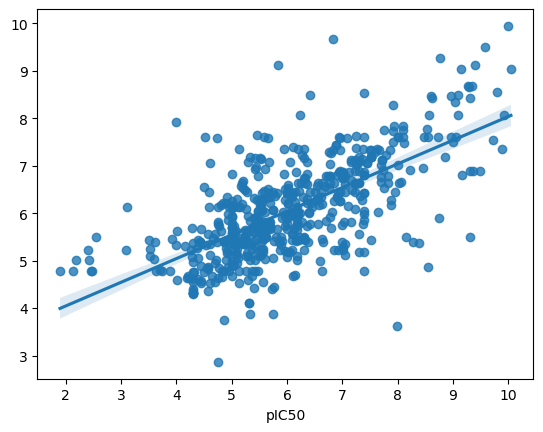

In [82]:
sns.regplot(ytest,m1.predict(xtest))

In [47]:
tr = DecisionTreeRegressor()
m2 = tr.fit(xtrain,ytrain)
metrics(xtrain,xtest,ytrain,ytest,m2)

Training set accuracy:0.70 
Test set accuracy:0.27 
Mean square error:1.34 
Mean absolute error:0.81 
Root Mean square error:1.16 
-------------------------------------


In [61]:
svr  =SVR()
m3 = svr.fit(xtrain,ytrain)
metrics(xtrain,xtest,ytrain,ytest,m3)

Training set accuracy:0.50 
Test set accuracy:0.42 
Mean square error:1.11 
Mean absolute error:0.74 
Root Mean square error:1.05 
-------------------------------------


In [75]:
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor()
m4 = knn.fit(xtrain,ytrain)
metrics(xtrain,xtest,ytrain,ytest,m4)

Training set accuracy:0.54 
Test set accuracy:0.38 
Mean square error:1.17 
Mean absolute error:0.78 
Root Mean square error:1.08 
-------------------------------------


In [80]:
lr = LinearRegression()
m5 = lr.fit(xtrain,ytrain)
metrics(xtrain,xtest,ytrain,ytest,m5)

Training set accuracy:0.48 
Test set accuracy:-2244399530638027784192.00 
Mean square error:4258376101396170145792.00 
Mean absolute error:3660250845.13 
Root Mean square error:65256234195.64 
-------------------------------------


In [85]:
pip install mlxtend

Note: you may need to restart the kernel to use updated packages.


In [88]:
## we will try to optimize rf

from mlxtend.feature_selection import SequentialFeatureSelector as sfs


In [90]:
sfs = SequentialFeatureSelector(estimator=rf, k_features='best', forward=True, floating=False, scoring='accuracy', cv=5)
selector = sfs.fit(xtrain,ytrain)



STOPPING EARLY DUE TO KEYBOARD INTERRUPT...

In [ ]:
features = list(selector.k_feature_names_)
features

In [ ]:
from sklearn.feature_selection import RFE


In [95]:
sfs = SequentialFeatureSelector(estimator=tr, k_features='best', forward=True, floating=False, scoring='accuracy', cv=2)
selector = sfs.fit(xtrain,ytrain)
features1 = list(selector.k_feature_names_)
features1


STOPPING EARLY DUE TO KEYBOARD INTERRUPT...

TypeError: 'NoneType' object is not iterable

In [97]:
from sklearn.feature_selection import SelectFromModel
sel = SelectFromModel(rf)
sel.fit(xtrain,ytrain)

SelectFromModel(estimator=RandomForestRegressor())

In [126]:
threshold_value = 0.1  # Set your desired threshold value

# Calculate the variance for each feature
variances = X.var()

# Filter out features below the threshold
selected_features = X.columns[variances >= threshold_value]

# Create a new DataFrame with the selected features
X1 = X[selected_features]

# Display the selected DataFrame
print(X1)

      PubchemFP2  PubchemFP12  PubchemFP14  PubchemFP15  PubchemFP16  \
0              1            1            1            0            0   
1              1            1            1            0            0   
2              1            1            1            1            0   
3              1            1            1            1            0   
4              1            1            1            1            0   
...          ...          ...          ...          ...          ...   
2885           1            1            0            0            0   
2886           1            1            1            1            0   
2887           1            1            1            1            1   
2888           0            0            1            1            0   
2889           0            1            1            1            1   

      PubchemFP18  PubchemFP19  PubchemFP20  PubchemFP33  PubchemFP143  ...  \
0               1            0            0            0

In [127]:
X1


,PubchemFP2,PubchemFP12,PubchemFP14,PubchemFP15,PubchemFP16,PubchemFP18,PubchemFP19,PubchemFP20,PubchemFP33,PubchemFP143,...,PubchemFP776,PubchemFP777,PubchemFP779,PubchemFP797,PubchemFP798,PubchemFP803,PubchemFP818,PubchemFP819,PubchemFP821,PubchemFP860
0,1,1,1,0,0,1,0,0,0,1,...,1,1,0,1,0,0,1,0,0,1
1,1,1,1,0,0,1,0,0,0,1,...,1,1,0,1,0,0,1,0,0,1
2,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
3,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
4,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2885,1,1,0,0,0,1,1,0,0,1,...,1,0,0,1,0,0,1,0,0,1
2886,1,1,1,1,0,1,1,0,1,1,...,1,1,0,1,1,0,1,0,0,0
2887,1,1,1,1,1,1,1,0,0,1,...,0,0,0,1,1,0,1,1,1,1
2888,0,0,1,1,0,1,1,0,1,1,...,1,1,0,1,1,0,1,0,0,0


In [128]:
X = df_prep.drop('Name',axis =1)
Y = df_pIC50["pIC50"]
xtrain,xtest,ytrain,ytest  = train_test_split(X1,Y, train_size= 0.80,random_state=1)

In [129]:
sel = SelectFromModel(rf)
sel.fit(xtrain,ytrain)

SelectFromModel(estimator=RandomForestRegressor())

In [146]:
features = xtrain.columns[(sel.get_support())]

In [150]:

xtrain,xtest,ytrain,ytest  = train_test_split(X1[features],Y, train_size= 0.80,random_state=1)
rf = rf = RandomForestRegressor()

model =rf.fit(xtrain,ytrain)
metrics(xtrain,xtest,ytrain,ytest,model)

Training set accuracy:0.66 
Test set accuracy:0.44 
Mean square error:1.07 
Mean absolute error:0.76 
Root Mean square error:1.03 
-------------------------------------


In [152]:
rf = RandomForestRegressor()
from sklearn.model_selection import GridSearchCV
param_grid={'n_estimators':[100,150,200] ,
            'min_samples_leaf' : range(1,5,1),
            'min_samples_split' : range(2,10,2),
            'max_depth' : range(5,50,5),
            'max_features': ['log2', 'sqrt']}
n_folds=3
cv= GridSearchCV(estimator=rf,param_grid=param_grid,cv=n_folds,verbose=3, n_jobs=-1, return_train_score=True)
cv.fit(xtrain, ytrain)
             

Fitting 3 folds for each of 864 candidates, totalling 2592 fits


GridSearchCV(cv=3, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'max_depth': range(5, 50, 5),
                         'max_features': ['log2', 'sqrt'],
                         'min_samples_leaf': range(1, 5),
                         'min_samples_split': range(2, 10, 2),
                         'n_estimators': [100, 150, 200]},
             return_train_score=True, verbose=3)

In [153]:
cv.best_estimator_

RandomForestRegressor(max_depth=15, max_features='log2', min_samples_leaf=2,
                      n_estimators=150)

In [155]:
rf = rf = RandomForestRegressor(max_depth=15, min_samples_leaf=2,
                      n_estimators=150)

model =rf.fit(xtrain,ytrain)
metrics(xtrain,xtest,ytrain,ytest,model)

Training set accuracy:0.63 
Test set accuracy:0.45 
Mean square error:1.04 
Mean absolute error:0.75 
Root Mean square error:1.02 
-------------------------------------


Feature Selection, Base Model Building

In [3]:
df1 = pd.read_csv('train_and_test.csv')

In [27]:
df1
df1a = df1.copy()
df1a.head()

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880,pIC50
0,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,5.148742
1,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,4.301030
2,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,6.623423
3,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,7.244125
4,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,7.267606


# using variance Threshold

In [63]:
var_01 = df1.columns[df1.var() < 0.01]
var_01

Index(['PubchemFP0', 'PubchemFP1', 'PubchemFP4', 'PubchemFP5', 'PubchemFP6',
       'PubchemFP7', 'PubchemFP8', 'PubchemFP9', 'PubchemFP10', 'PubchemFP11',
       ...
       'PubchemFP871', 'PubchemFP872', 'PubchemFP873', 'PubchemFP874',
       'PubchemFP875', 'PubchemFP876', 'PubchemFP877', 'PubchemFP878',
       'PubchemFP879', 'PubchemFP880'],
      dtype='object', length=450)

In [64]:
df1a.drop(columns = var_01,inplace =True)

In [65]:
df1a.shape

(2890, 432)

In [26]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV,train_test_split


In [66]:
X = df1a.drop(columns =['pIC50'])
y = df1a['pIC50']

In [67]:
X.shape

(2890, 431)

In [166]:
xtrain,xtest,ytrain,ytest = train_test_split(X,y ,random_state=1,train_size=.80)

In [152]:
perf_score = pd.DataFrame(columns=['Model','R2_Train','R2_Test','RMSE Train','RMSE TEST','MAPE' ] )

def per_measures(model):

   #-----------------------------------------------#
   # Calculation of R square and Adj R2            #
   #-----------------------------------------------#

   # calculate rsquare value

    rsq_train = model.score(xtrain, ytrain)
    rsq_test  = model.score(xtest, ytest)

    # calculating adjusted rsquare value
    n =xtrain.shape[0]
    k = xtrain.shape[1]
    rsq_adj = 1 - ((1-rsq_test)*(n-1)/(n-k-1))


   #-----------------------------------------------#
   # Model getting trained                         #
   #-----------------------------------------------#

    model.fit(xtrain,ytrain)

    pred_train = model.predict(xtrain)
    pred_test = model.predict(xtest)

   #-----------------------------------------------#
   # Calculation of RMSE and MAPE                  #
   #-----------------------------------------------#

    rmse_train =np.sqrt(mean_squared_error(ytrain,pred_train))
    rmse_test  =np.sqrt(mean_squared_error(ytest,pred_test))


    MAPE_test = (np.mean(np.abs((ytest - pred_test) / ytest)) * 100)


    return (rsq_train,rsq_test,rmse_train,rmse_test,MAPE_test)




####



def update_performance (name, model):


    # assign 'comp_perf' as global variable
    global perf_score


    # append the results to the dataframe 'score_card'
    # 'ignore_index = True' do not consider the index labels
    perf_score = perf_score.append({'Model'          : name,
                                    
                                    'R2_Train'       : per_measures(model)[0],
                                    'R2_Test'        : per_measures(model)[1],
                                    'RMSE Train'     : per_measures(model)[2],
                                    'RMSE TEST'      : per_measures(model)[3],
                                    'MAPE'           : per_measures(model)[4]
                                    },
                                   ignore_index = True)

In [ ]:
# finding optimal parameters for Lasso

In [70]:
la =Lasso(0.0001)
model_lasso = la.fit(xtrain,ytrain)
model_lasso.score(xtest,ytest)


0.34260023721365096

In [72]:

la =Lasso()
param ={'alpha':[0.0001,0.001,0.002,0.0025,0.005,0.01,0.02,0.5,0.75,1,2,5,7,8,10,25,30,50,100,150,200,1000,10000]}
grd =GridSearchCV(estimator=la,param_grid=param,scoring='neg_root_mean_squared_error',cv =5)
grd.fit(xtrain,ytrain)


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.002, 0.0025, 0.005, 0.01,
                                   0.02, 0.5, 0.75, 1, 2, 5, 7, 8, 10, 25, 30,
                                   50, 100, 150, 200, 1000, 10000]},
             scoring='neg_root_mean_squared_error')

In [73]:
grd.best_params_

{'alpha': 0.002}

In [74]:
la =Lasso(0.002)
model_lasso = la.fit(xtrain,ytrain)


In [75]:
lass0_coeff = pd.DataFrame(model_lasso.coef_,xtrain.columns)
lass_fs = lass0_coeff[lass0_coeff[0] > 0].index


In [76]:
xtrain_l = xtrain[lass_fs]

In [77]:
update_performance('lasso_alpha_0.002',model_lasso)
perf_score

,Model,R2_Train,R2_Test,RMSE Train,RMSE TEST,MAPE
0,lasso_alpha_0.002,0.469831,0.39298,1.055126,1.073182,14.71194


 we have used the lasso regularization as feature selection here 
and we reduced it to 91

In [52]:

from sklearn.tree import DecisionTreeRegressor

In [83]:
tree = DecisionTreeRegressor()
tree.fit(xtrain_l,ytrain)
tree.score(xtest[lass_fs],ytest)

0.31729164869292437

In [88]:
tree.score(xtrain[lass_fs],ytrain)

0.7039993282022831

In [58]:
from mlxtend.feature_selection import SequentialFeatureSelector as sfs
from sklearn.feature_selection import RFE

In [60]:
len(xtrain.columns)

881

In [119]:
tree_df  = pd.DataFrame(columns=['Model','R2_Train','R2_Test','RMSE Train','RMSE TEST', ] )



def met(model):
    

    rsq_train = model.score(xtrain1, ytrain)
    rsq_test  = model.score(xtest1, ytest)

    # calculating adjusted rsquare value
    n =xtrain1.shape[0]
    k = xtrain1.shape[1]
    rsq_adj = 1 - ((1-rsq_test)*(n-1)/(n-k-1))


   #-----------------------------------------------#
   # Model getting trained                         #
   #-----------------------------------------------#

    model.fit(xtrain1,ytrain)

    pred_train = model.predict(xtrain1)
    pred_test = model.predict(xtest1)

   #-----------------------------------------------#
   # Calculation of RMSE and MAPE                  #
   #-----------------------------------------------#

    rmse_train =np.sqrt(mean_squared_error(ytrain,pred_train))
    rmse_test  =np.sqrt(mean_squared_error(ytest,pred_test))




    return (rsq_train,rsq_test,rmse_train,rmse_test)




####



def update_featutre (name, model):


    # assign 'comp_perf' as global variable
    global tree_df


    # append the results to the dataframe 'score_card'
    # 'ignore_index = True' do not consider the index labels
    tree_df = tree_df.append({'Model'          : name,
                                    
                                    'R2_Train'       : met(model)[0],
                                    'R2_Test'        : met(model)[1],
                                    'RMSE Train'     : met(model)[2],
                                    'RMSE TEST'      : met(model)[3],
                                    
                                    },
                                   ignore_index = True)



In [122]:
tree1 =DecisionTreeRegressor()

for i in [400,375,350,300,275,250,225,220,200,180,170,150,130,125,110,105,100,95,90]:
    rfe =RFE(estimator=tree1,n_features_to_select=i)
    rfe.fit(xtrain,ytrain)
    
    a = rfe.get_feature_names_out()
    tree = DecisionTreeRegressor()
    xtrain1= xtrain[a]
    xtest1 =xtest[a]
    tree_1 =tree.fit(xtrain1,ytrain)
    update_featutre('DTree_Fea_'+str(i),tree_1)
print(tree_df)



            Model  R2_Train   R2_Test  RMSE Train  RMSE TEST
0            name  0.732427  0.293261    0.749581   1.174303
1   DTree_Fea_400  0.740629  0.259667    0.738003   1.184743
2   DTree_Fea_375  0.740629  0.229372    0.738003   1.209326
3   DTree_Fea_350  0.740629  0.269959    0.738003   1.204930
4   DTree_Fea_300  0.740629  0.238617    0.738003   1.167802
5   DTree_Fea_275  0.740629  0.267724    0.738003   1.188383
6   DTree_Fea_250  0.740629  0.219299    0.738003   1.208995
7   DTree_Fea_225  0.740628  0.258073    0.738005   1.173004
8   DTree_Fea_220  0.740629  0.295554    0.738003   1.178573
9   DTree_Fea_200  0.740622  0.270721    0.738013   1.179087
10  DTree_Fea_180  0.740592  0.278394    0.738056   1.180659
11  DTree_Fea_170  0.740592  0.251439    0.738056   1.184804
12  DTree_Fea_150  0.739883  0.248970    0.739063   1.180587
13  DTree_Fea_130  0.737333  0.264769    0.742678   1.182586
14  DTree_Fea_125  0.735824  0.285447    0.744808   1.194930
15  DTree_Fea_110  0.734

In [90]:
    rfe =RFE(estimator=la,n_features_to_select=100)
    rfe.fit(xtrain,ytrain)

RFE(estimator=Lasso(alpha=0.002), n_features_to_select=100)

95 the lowest has the lowest error difference we will try agian with low numbers 

In [129]:
for i in [91,87,85,81,77,75,60,50]:
    rfe =RFE(estimator=tree1,n_features_to_select=i)
    rfe.fit(xtrain,ytrain)
    
    a = rfe.get_feature_names_out()
    tree = DecisionTreeRegressor()
    xtrain1= xtrain[a]
    xtest1 =xtest[a]
    tree_1 =tree.fit(xtrain1,ytrain)
    update_featutre('DTree_Fea_'+str(i),tree_1)
print(tree_df)


            Model  R2_Train   R2_Test  RMSE Train  RMSE TEST  Error_diff
0   DTree_Fea_400  0.740629  0.259667    0.738003   1.184743    0.446740
1   DTree_Fea_375  0.740629  0.229372    0.738003   1.209326    0.471323
2   DTree_Fea_350  0.740629  0.269959    0.738003   1.204930    0.466927
3   DTree_Fea_300  0.740629  0.238617    0.738003   1.167802    0.429799
4   DTree_Fea_275  0.740629  0.267724    0.738003   1.188383    0.450380
5   DTree_Fea_250  0.740629  0.219299    0.738003   1.208995    0.470992
6   DTree_Fea_225  0.740628  0.258073    0.738005   1.173004    0.434999
7   DTree_Fea_220  0.740629  0.295554    0.738003   1.178573    0.440570
8   DTree_Fea_200  0.740622  0.270721    0.738013   1.179087    0.441074
9   DTree_Fea_180  0.740592  0.278394    0.738056   1.180659    0.442603
10  DTree_Fea_170  0.740592  0.251439    0.738056   1.184804    0.446748
11  DTree_Fea_150  0.739883  0.248970    0.739063   1.180587    0.441524
12  DTree_Fea_130  0.737333  0.264769    0.742678  

In [131]:
for i in [58,56,54,52]:
    rfe =RFE(estimator=tree1,n_features_to_select=i)
    rfe.fit(xtrain,ytrain)
    
    a = rfe.get_feature_names_out()
    tree = DecisionTreeRegressor()
    xtrain1= xtrain[a]
    xtest1 =xtest[a]
    tree_1 =tree.fit(xtrain1,ytrain)
    update_featutre('DTree_Fea_'+str(i),tree_1)
print(tree_df)


            Model  R2_Train   R2_Test  RMSE Train  RMSE TEST  Error_diff
0   DTree_Fea_400  0.740629  0.259667    0.738003   1.184743    0.446740
1   DTree_Fea_375  0.740629  0.229372    0.738003   1.209326    0.471323
2   DTree_Fea_350  0.740629  0.269959    0.738003   1.204930    0.466927
3   DTree_Fea_300  0.740629  0.238617    0.738003   1.167802    0.429799
4   DTree_Fea_275  0.740629  0.267724    0.738003   1.188383    0.450380
5   DTree_Fea_250  0.740629  0.219299    0.738003   1.208995    0.470992
6   DTree_Fea_225  0.740628  0.258073    0.738005   1.173004    0.434999
7   DTree_Fea_220  0.740629  0.295554    0.738003   1.178573    0.440570
8   DTree_Fea_200  0.740622  0.270721    0.738013   1.179087    0.441074
9   DTree_Fea_180  0.740592  0.278394    0.738056   1.180659    0.442603
10  DTree_Fea_170  0.740592  0.251439    0.738056   1.184804    0.446748
11  DTree_Fea_150  0.739883  0.248970    0.739063   1.180587    0.441524
12  DTree_Fea_130  0.737333  0.264769    0.742678  

In [132]:
tree_df['Error_diff'] = tree_df['RMSE TEST'] -tree_df['RMSE Train']
tree_df.sort_values(by = 'Error_diff')

,Model,R2_Train,R2_Test,RMSE Train,RMSE TEST,Error_diff
30,DTree_Fea_52,0.708364,0.351246,0.782561,1.078227,0.295666
26,DTree_Fea_50,0.703847,0.313595,0.788598,1.129608,0.341010
28,DTree_Fea_56,0.711323,0.306587,0.778580,1.150807,0.372227
29,DTree_Fea_54,0.715568,0.288366,0.772834,1.150270,0.377436
27,DTree_Fea_58,0.717092,0.283333,0.770762,1.152874,0.382112
25,DTree_Fea_60,0.718689,0.320823,0.768583,1.157011,0.388427
22,DTree_Fea_81,0.729764,0.286166,0.753301,1.170160,0.416859
21,DTree_Fea_85,0.731781,0.294064,0.750485,1.171980,0.421495
19,DTree_Fea_91,0.731145,0.299155,0.751375,1.174990,0.423615
23,DTree_Fea_77,0.727492,0.280879,0.756462,1.180407,0.423945


due to more compuatational time we are reducing the number of features using 

now we have selected th DTR model with 50 features we will agian use sfs with best to ideal  features 


In [133]:
    rfe =RFE(estimator=tree1,n_features_to_select=52)
    rfe.fit(xtrain,ytrain)
    
    a = rfe.get_feature_names_out()
    

In [135]:
a

array(['PubchemFP2', 'PubchemFP3', 'PubchemFP12', 'PubchemFP14',
       'PubchemFP16', 'PubchemFP19', 'PubchemFP23', 'PubchemFP181',
       'PubchemFP186', 'PubchemFP192', 'PubchemFP257', 'PubchemFP258',
       'PubchemFP261', 'PubchemFP327', 'PubchemFP335', 'PubchemFP340',
       'PubchemFP365', 'PubchemFP366', 'PubchemFP374', 'PubchemFP419',
       'PubchemFP431', 'PubchemFP438', 'PubchemFP439', 'PubchemFP457',
       'PubchemFP482', 'PubchemFP502', 'PubchemFP515', 'PubchemFP516',
       'PubchemFP542', 'PubchemFP572', 'PubchemFP585', 'PubchemFP592',
       'PubchemFP593', 'PubchemFP617', 'PubchemFP618', 'PubchemFP641',
       'PubchemFP666', 'PubchemFP667', 'PubchemFP672', 'PubchemFP688',
       'PubchemFP693', 'PubchemFP695', 'PubchemFP696', 'PubchemFP697',
       'PubchemFP699', 'PubchemFP712', 'PubchemFP735', 'PubchemFP777',
       'PubchemFP800', 'PubchemFP818', 'PubchemFP819', 'PubchemFP860'],
      dtype=object)

In [136]:
from sklearn.ensemble import RandomForestRegressor

In [137]:
tree = DecisionTreeRegressor()
sfs_dt = sfs(estimator=tree,k_features='best')
sfs_dt.fit(xtrain[a],ytrain)


SequentialFeatureSelector(estimator=DecisionTreeRegressor(), k_features=(1, 52),
                          scoring='r2')

In [171]:
xtest_best.shape

(578, 23)

In [169]:
xtrain_best = xtrain[list(sfs_dt.k_feature_names_)]
xtest_best = xtest[list(sfs_dt.k_feature_names_)]

now we have reduced the features to 23 from 461 that are relevant now we will optimize this using non parametric methods

In [ ]:
sns.scatterplot(xtr)

In [148]:

xtrain.columns

Index(['PubchemFP2', 'PubchemFP3', 'PubchemFP12', 'PubchemFP13', 'PubchemFP14',
       'PubchemFP15', 'PubchemFP16', 'PubchemFP18', 'PubchemFP19',
       'PubchemFP20',
       ...
       'PubchemFP821', 'PubchemFP822', 'PubchemFP824', 'PubchemFP826',
       'PubchemFP827', 'PubchemFP828', 'PubchemFP839', 'PubchemFP840',
       'PubchemFP860', 'PubchemFP861'],
      dtype='object', length=431)

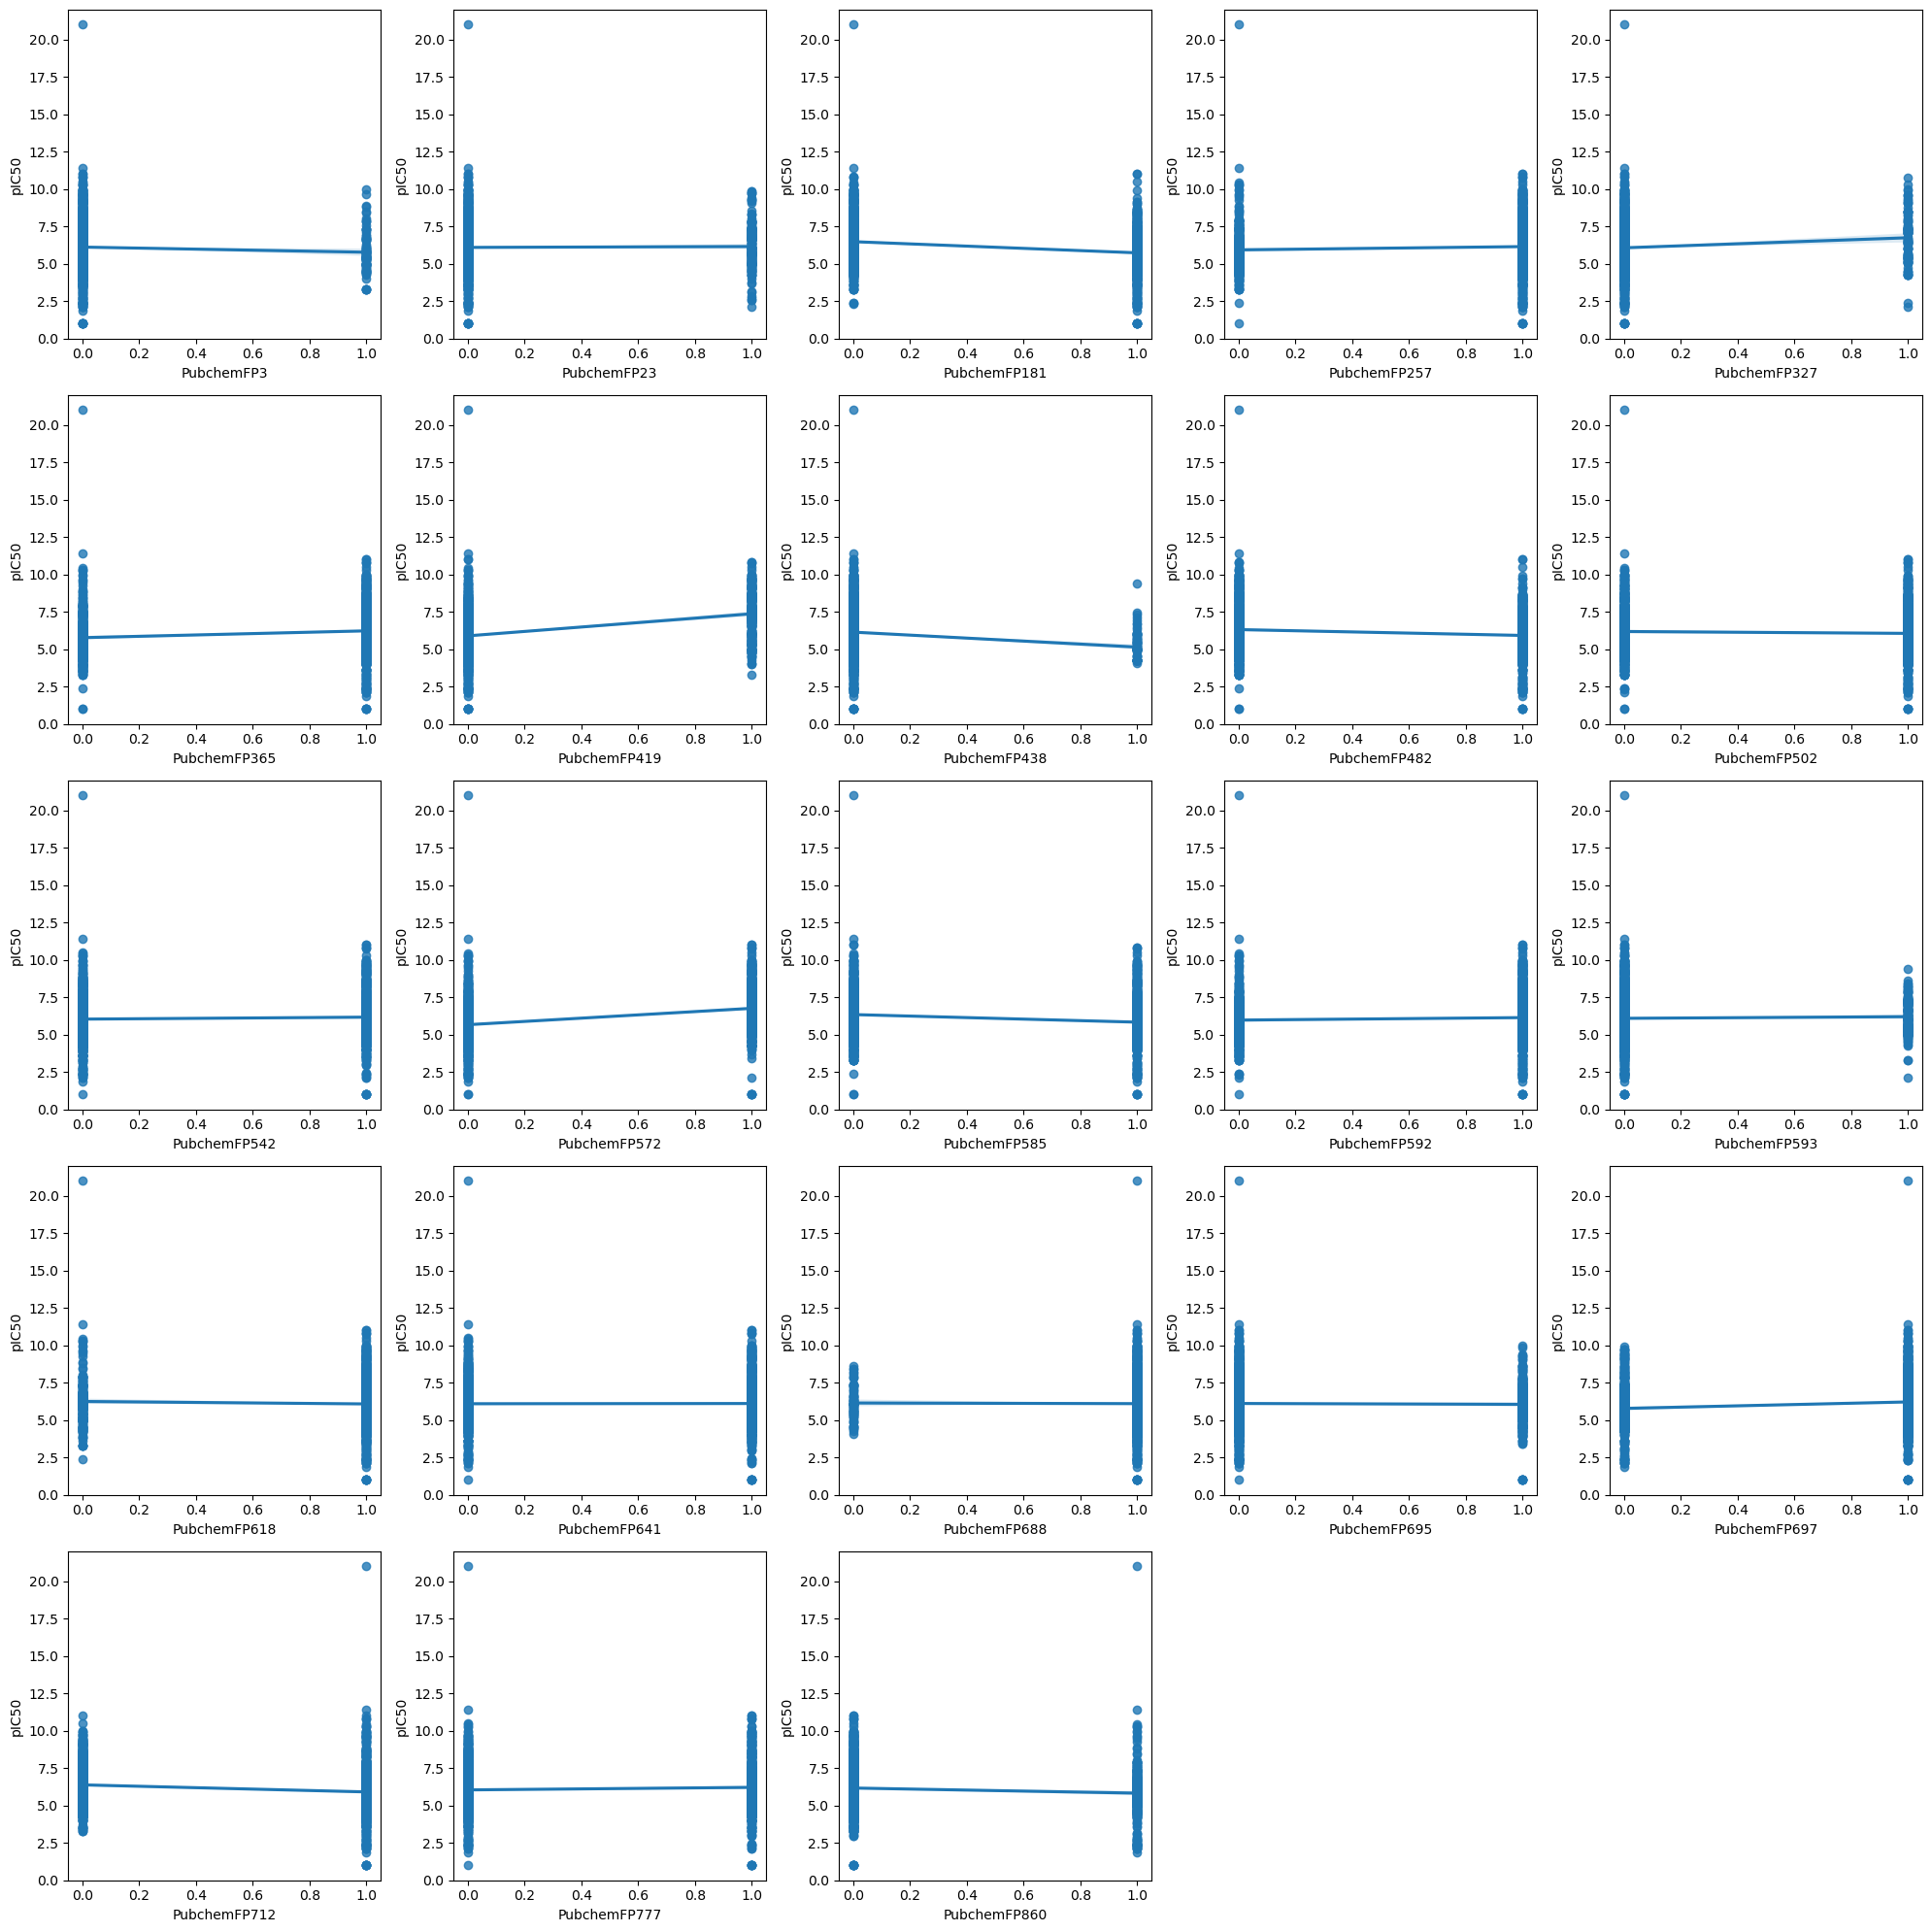

In [151]:
j = 1
plt.figure(figsize=(20,20))
for i in xtrain_best.columns:
    plt.subplot(5,5,j)
    sns.regplot(xtrain[i],ytrain)
    j +=1
plt.tight_layout()
plt.show()


In [153]:
perf_score = pd.DataFrame(columns=['Model','R2_Train','R2_Test','RMSE Train','RMSE TEST','MAPE' ] )

def per_measures(model):

   #-----------------------------------------------#
   # Calculation of R square and Adj R2            #
   #-----------------------------------------------#

   # calculate rsquare value

    rsq_train = model.score(xtrain, ytrain)
    rsq_test  = model.score(xtest, ytest)

    # calculating adjusted rsquare value
    n =xtrain.shape[0]
    k = xtrain.shape[1]
    rsq_adj = 1 - ((1-rsq_test)*(n-1)/(n-k-1))


   #-----------------------------------------------#
   # Model getting trained                         #
   #-----------------------------------------------#

    model.fit(xtrain,ytrain)

    pred_train = model.predict(xtrain)
    pred_test = model.predict(xtest)

   #-----------------------------------------------#
   # Calculation of RMSE and MAPE                  #
   #-----------------------------------------------#

    rmse_train =np.sqrt(mean_squared_error(ytrain,pred_train))
    rmse_test  =np.sqrt(mean_squared_error(ytest,pred_test))


    MAPE_test = (np.mean(np.abs((ytest - pred_test) / ytest)) * 100)


    return (rsq_train,rsq_test,rmse_train,rmse_test,MAPE_test)




####



def update_performance (name, model):


    # assign 'comp_perf' as global variable
    global perf_score


    # append the results to the dataframe 'score_card'
    # 'ignore_index = True' do not consider the index labels
    perf_score = perf_score.append({'Model'          : name,
                                    
                                    'R2_Train'       : per_measures(model)[0],
                                    'R2_Test'        : per_measures(model)[1],
                                    'RMSE Train'     : per_measures(model)[2],
                                    'RMSE TEST'      : per_measures(model)[3],
                                    'MAPE'           : per_measures(model)[4]
                                    },
                                   ignore_index = True)

In [173]:
xtrain  = xtrain_best
xtest = xtest_best

In [177]:
tree = DecisionTreeRegressor()
model_tree = tree.fit(xtrain,ytrain)
update_performance('DT_base_model',model_tree)
perf_score

,Model,R2_Train,R2_Test,RMSE Train,RMSE TEST,MAPE
0,DT_base_model,0.563826,0.366744,0.957034,1.10244,14.676889


In [178]:
rf = RandomForestRegressor()
model_rf = rf.fit(xtrain,ytrain)
update_performance('RF_base_model',model_rf)
perf_score

,Model,R2_Train,R2_Test,RMSE Train,RMSE TEST,MAPE
0,DT_base_model,0.563826,0.366744,0.957034,1.102440,14.676889
1,RF_base_model,0.555674,0.390372,0.965941,1.072752,14.475736


In [179]:
#hyperparameter tuning for decision 
tree = DecisionTreeRegressor()
params = {'max_depth':[2,5,6,7,8,10,15,20,25,30]
         ,'min_samples_split':[1,2,3,4,5,6,7,8],
         'min_samples_leaf' :[1,2,3,4,5]}
grd_dt = GridSearchCV(estimator=tree, param_grid=params,cv = 3)
grd_dt.fit(xtrain,ytrain)

GridSearchCV(cv=3, estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': [2, 5, 6, 7, 8, 10, 15, 20, 25, 30],
                         'min_samples_leaf': [1, 2, 3, 4, 5],
                         'min_samples_split': [1, 2, 3, 4, 5, 6, 7, 8]})

In [180]:
grd_dt.best_params_

{'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 7}

In [181]:
tree = DecisionTreeRegressor(max_depth=10,min_samples_leaf=1,min_samples_split=7)
model_tree = tree.fit(xtrain,ytrain)
update_performance('DT_base_tuned',model_tree)
perf_score

,Model,R2_Train,R2_Test,RMSE Train,RMSE TEST,MAPE
0,DT_base_model,0.563826,0.366744,0.957034,1.102440,14.676889
1,RF_base_model,0.555674,0.390372,0.965941,1.072752,14.475736
2,DT_base_tuned,0.513934,0.366805,1.010287,1.094348,14.806811


In [183]:
rf = RandomForestRegressor()
params = {'n_estimators':[50,100,110,125,150]
    ,'max_depth':[2,5,6,7,8,10,15,20,25,30]
         ,'min_samples_split':[1,2,3,4,5,6,7,8],
         'min_samples_leaf' :[1,2,3,4,5]}
grd_rf = GridSearchCV(estimator=rf, param_grid=params,cv = 3)
grd_rf.fit(xtrain,ytrain)

GridSearchCV(cv=3, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [2, 5, 6, 7, 8, 10, 15, 20, 25, 30],
                         'min_samples_leaf': [1, 2, 3, 4, 5],
                         'min_samples_split': [1, 2, 3, 4, 5, 6, 7, 8],
                         'n_estimators': [50, 100, 110, 125, 150]})

In [184]:
grd_rf.best_params_

{'max_depth': 30,
 'min_samples_leaf': 1,
 'min_samples_split': 6,
 'n_estimators': 100}

In [189]:
rf= RandomForestRegressor(max_depth=30,min_samples_leaf=1,min_samples_split=6,n_estimators=100)
model_rf = rf.fit(xtrain,ytrain)
update_performance('RF_base_tuned',model_rf)
perf_score

,Model,R2_Train,R2_Test,RMSE Train,RMSE TEST,MAPE
0,DT_base_model,0.563826,0.366744,0.957034,1.102440,14.676889
1,RF_base_model,0.555674,0.390372,0.965941,1.072752,14.475736
2,DT_base_tuned,0.513934,0.366805,1.010287,1.094348,14.806811
3,RF_base_tuned,0.543525,0.407950,0.979127,1.067560,14.460506


In [190]:
from sklearn.ensemble import GradientBoostingRegressor

In [194]:
gdb =GradientBoostingRegressor()

model_GBR =gdb.fit(xtrain,ytrain)
update_performance('GBR_base',model_GBR)
perf_score

,Model,R2_Train,R2_Test,RMSE Train,RMSE TEST,MAPE
0,DT_base_model,0.563826,0.366744,0.957034,1.102440,14.676889
1,RF_base_model,0.555674,0.390372,0.965941,1.072752,14.475736
2,DT_base_tuned,0.513934,0.366805,1.010287,1.094348,14.806811
3,RF_base_tuned,0.543525,0.407950,0.979127,1.067560,14.460506
4,GBR_base,0.422393,0.367490,1.101320,1.095547,15.452439


In [201]:
perf_score['Error_diff'] = perf_score['RMSE TEST'] - perf_score['RMSE Train'] 

In [198]:
perf_score.sort_values(by = 'Error_diff')

,Model,R2_Train,R2_Test,RMSE Train,RMSE TEST,MAPE,Error_diff
4,GBR_base,0.422393,0.367490,1.101320,1.095547,15.452439,-0.005773
2,DT_base_tuned,0.513934,0.366805,1.010287,1.094348,14.806811,0.084061
3,RF_base_tuned,0.543525,0.407950,0.979127,1.067560,14.460506,0.088433
1,RF_base_model,0.555674,0.390372,0.965941,1.072752,14.475736,0.106812
0,DT_base_model,0.563826,0.366744,0.957034,1.102440,14.676889,0.145406


In [199]:
gb_regressor = GradientBoostingRegressor()

# Define the grid of hyperparameters to search
param_grid = {
    'n_estimators': [100, 200, 300],         # Number of boosting rounds (trees)
    'learning_rate': [0.01, 0.1, 0.2],        # Step size shrinkage to prevent overfitting
    'max_depth': [3, 4, 5],                   # Maximum depth of a tree
    'subsample': [0.8, 1.0],                  # Fraction of samples used for fitting trees
}

# Create a GridSearchCV instance
grid_search = GridSearchCV(estimator=gb_regressor, param_grid=param_grid, cv=3)

# Fit the grid search on the training data
grid_search.fit(xtrain, ytrain)

# Get the best hyperparameters
grid_search.best_params_


{'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 100, 'subsample': 1.0}

In [200]:

gdb =GradientBoostingRegressor(learning_rate=0.1,max_depth=5,n_estimators=100,subsample=1.0)

model_GBR =gdb.fit(xtrain,ytrain)
update_performance('GBR_base_tuned',model_GBR)
perf_score

,Model,R2_Train,R2_Test,RMSE Train,RMSE TEST,MAPE,Error_diff
0,DT_base_model,0.563826,0.366744,0.957034,1.102440,14.676889,0.145406
1,RF_base_model,0.555674,0.390372,0.965941,1.072752,14.475736,0.106812
2,DT_base_tuned,0.513934,0.366805,1.010287,1.094348,14.806811,0.084061
3,RF_base_tuned,0.543525,0.407950,0.979127,1.067560,14.460506,0.088433
4,GBR_base,0.422393,0.367490,1.101320,1.095547,15.452439,-0.005773
5,GBR_base_tuned,0.513619,0.411381,1.010615,1.055341,14.544300,NaN


In [202]:
perf_score.sort_values(by = 'Error_diff')

,Model,R2_Train,R2_Test,RMSE Train,RMSE TEST,MAPE,Error_diff
4,GBR_base,0.422393,0.367490,1.101320,1.095547,15.452439,-0.005773
5,GBR_base_tuned,0.513619,0.411381,1.010615,1.055341,14.544300,0.044726
2,DT_base_tuned,0.513934,0.366805,1.010287,1.094348,14.806811,0.084061
3,RF_base_tuned,0.543525,0.407950,0.979127,1.067560,14.460506,0.088433
1,RF_base_model,0.555674,0.390372,0.965941,1.072752,14.475736,0.106812
0,DT_base_model,0.563826,0.366744,0.957034,1.102440,14.676889,0.145406


the gbr tuned is performing better here in case of r2 and error

<AxesSubplot:xlabel='pIC50'>

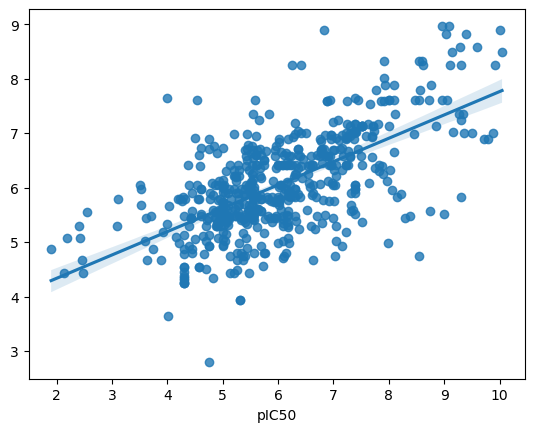

In [203]:
sns.regplot(ytest,gdb.predict(xtest))

In [208]:
ytest.mean()

6.049967341052707

Conclusion
The r2 score without outliers is 0.13, which does not imply a strong correlation. This is expected as PubChem fingerprints is a less accurate molecular representation of the compounds compared to newer techniques.⁷ However, visually, the points are clustered around the linear regression line and there are a reasonable amount of outliers, so the model did fit the data to a reasonable extent. This script can be improved by using a more accurate molecular fingerprint and potentially using other models that can fit the data better.

A rough guide to interpreting pIC50 values:

pIC50 > 9: High potency, strong inhibition.
pIC50 in the range of 6 to 9: Moderate potency.
pIC50 < 6: Lower potency, weaker inhibition.

In [206]:
gdb.predict(xtest)

array([5.72612557, 5.89342888, 4.7432464 , 5.43353986, 5.82819237,
       5.79588751, 5.43226505, 5.97206225, 5.79823541, 6.97271845,
       5.8655018 , 6.35713679, 4.7432464 , 6.40451623, 4.97739678,
       8.89493284, 5.68090149, 5.7971134 , 5.84372903, 7.0072619 ,
       6.32369938, 5.94793381, 5.35434681, 6.68744998, 6.2673331 ,
       7.16777478, 6.58881448, 7.61613604, 6.25423672, 4.74194596,
       5.94793381, 5.43226505, 5.47868366, 5.7971134 , 6.09002346,
       6.68744998, 5.48719799, 5.43353986, 5.43353986, 6.41695256,
       5.68101983, 6.66811854, 6.19887162, 5.97206225, 5.47980973,
       6.58881448, 5.97542799, 5.55968817, 5.57526456, 4.87060775,
       4.87060775, 4.49906434, 7.021793  , 7.23569332, 5.57526456,
       4.67877441, 7.0072619 , 4.7488209 , 6.50413707, 6.92088301,
       5.95737297, 6.8830116 , 5.76709523, 5.07897202, 7.61613604,
       5.73536863, 7.61613604, 5.68090149, 5.68101983, 5.28810873,
       5.47980973, 6.8830116 , 6.85520438, 5.54385026, 6.60361